class: golfcourse   pro: 0.973


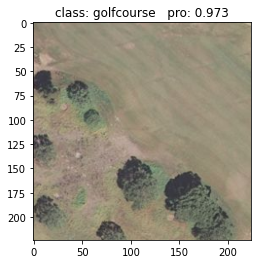

In [4]:
import os
import json
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from MobileNet_v2 import MobileNetV2

def main():
    im_height = 224
    im_width = 224
    num_classes = 21

    # 导入图片
    img_path = "test.jpg"
    assert os.path.exists(img_path), "file: '{}' dose not exist.".format(img_path)
    img = Image.open(img_path)
    # 图片像素 => 224x224
    img = img.resize((im_width, im_height))
    plt.imshow(img)

    # 归一化
    img = np.array(img).astype(np.float32)
    img = ((img / 255.) - 0.5) * 2.0

    # 增加纬度，以满足模型
    img = (np.expand_dims(img, 0))

    # 读分类json
    json_path = './class_indices.json'
    assert os.path.exists(json_path), "file: '{}' dose not exist.".format(json_path)

    json_file = open(json_path, "r")
    class_indict = json.load(json_file)

    # 创建模型
    feature = MobileNetV2(include_top=False)
    model = tf.keras.Sequential([feature,
                                 tf.keras.layers.GlobalAvgPool2D(),
                                 tf.keras.layers.Dropout(rate=0.5),
                                 tf.keras.layers.Dense(num_classes),
                                 tf.keras.layers.Softmax()])
    weights_path = './save_weights/resMobileNetV2.ckpt'
    assert len(glob.glob(weights_path+"*")), "cannot find {}".format(weights_path)
    model.load_weights(weights_path)

    result = np.squeeze(model.predict(img))
    predict_class = np.argmax(result)

    print_res = "class: {}   pro: {:.3}".format(class_indict[str(predict_class)],
                                                 result[predict_class])
    plt.title(print_res)
    print(print_res)
    plt.show()


if __name__ == '__main__':
    main()
